# ИГРОВАЯ ИНДУСТРИЯ

Цель проекта - исследование данных о продаже компьютерных игр с целью планирования будущей рекламной компании. В проекте необходимо исследовать рынок компьютерных игр в зависимости от года, консоли и жанра, а также сформировать портреты пользователей по разным регионам, исходя из их игровых предпочтений. Также необходимо произвести проверку статистических гипотез касательно взаимосвязи жанра и оценок.

План работы:

- Загрузка данных и библиотек
- Обработка данных
- Исследовательский анализ данных
- Формирование портрета пользователя
- Проверка статистических гипотез


<div class="alert alert-block alert-info">
  
  <b>Шаг 1. Загрузка данных </b>

In [119]:
#импорт библиотек
import pandas as pd
import plotly as plt
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
pd.set_option('display.max_columns', 300)
%matplotlib inline
from scipy import stats as st
from math import factorial
import math
from scipy import stats as st

In [120]:
#загрузка данных
df = pd.read_csv('C:/data/games.csv')


<div class="alert alert-block alert-info">
  
  <b>Шаг 2. Подготовка данных</b>

In [121]:
#Приведем названия столбцов к змеиному регистру:
df = df.rename(columns=
               {'Name': 'name',
                'Platform' : 'platform',
                'Year_of_Release' : 'year_of_release',
                'Genre' : 'genre',
                'NA_sales' : 'na_sales',
                'EU_sales' : 'eu_sales',
                'JP_sales' : 'jp_sales',
                'Other_sales' : 'other_sales',
                'Critic_Score' : 'critic_score',
                'User_Score' : 'user_score',
                'Rating' : 'rating'
              
               }             
              )

In [122]:
#визуализируем данные
display(df.head(20))
df.info()
df = df.drop_duplicates().reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [123]:
#изолируем две игры с пропусками в названии
df_nan = df.query('name != name')
display(df_nan)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


По всей видимости, в данных строках просто пропущены данные об игре, при этом указано то, что может заинтересовать нас в статистике: платформа, год релиза, продажи. Предлагается оставить эти строки, т.к. игру по году и платформе угадать не получится. В остальном пропуски присутствуют по году релиза, оценкам критиков и игроков, а также рейтингу
далее проработаем каждый столбец отдельно.

In [124]:
#name
print (df['name'].nunique())
#Уникальных значений значительно меньше, чем строк. Возможно имеется в виду одна и та же игра на одной платформе. Проверим:
display(df.query('"Tetris" in name'))
#как мы видим, действительно, одна и та же игра на разных платформах - это отдельная строчка.


11559


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
157,Tetris,NES,1988.0,Puzzle,2.97,0.69,1.81,0.11,NaN,NaN,NaN


In [125]:
#platorm
print (df['platform'].unique())
#дубликаты не обнаружены

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [126]:
#year_of_release

#наблюдается значительное количество пропусков по годам, проверим, что пропущено:
#теоретичски, для каждой игры просто можно дополнить этот столбец, т.к. каждая игра гуглится. 
#в проекте предполагается прогнозирование продаж, поэтому если продажи игры невелики, то тратить время на поиск дат для 300 игр не целесообразно
#оценим, присутствуют ли игры с большим количеством продаж и пропущенными годами:
#добавим столбец с суммарными продажами:
df['all_sales'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']

display(df.query('year_of_release != year_of_release').sort_values(by='all_sales', ascending=False).head(20))
#оценим, насколько это большие объемы продаж на этапе анализа объемов продаж.
#на последнем этапе данного шага можно увидеть, что для ранних лет игровой индустрии миллион копий - это очень много.
#отыщем года для игр, где суммарный объем продаж превысил 2 миллиона копий:





,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,2.33
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,2.24
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09


In [127]:
#присвоение годов самым популярным играм
df.loc[183,'year_of_release'] = 2004
df.loc[377,'year_of_release'] = 2004
df.loc[456,'year_of_release'] = 2008
df.loc[475,'year_of_release'] = 2006
df.loc[609,'year_of_release'] = 1978
df.loc[627,'year_of_release'] = 2007
df.loc[657,'year_of_release'] = 2001
df.loc[678,'year_of_release'] = 2008
df.loc[719,'year_of_release'] = 2006
df.loc[805,'year_of_release'] = 2007
#df['year_of_release'] = df['year_of_release'].astype('Int64')

In [128]:
#critic_score
#пропусков достаточно много. Проверим, в какие годы они встречаются:
print (df.query('critic_score != critic_score').fillna(0).groupby('year_of_release')['critic_score'].count())




year_of_release
0.0       113
1978.0      1
1980.0      9
1981.0     46
1982.0     36
1983.0     17
1984.0     14
1985.0     13
1986.0     21
1987.0     16
1988.0     14
1989.0     17
1990.0     16
1991.0     41
1992.0     42
1993.0     62
1994.0    120
1995.0    219
1996.0    255
1997.0    272
1998.0    351
1999.0    299
2000.0    207
2001.0    156
2002.0    202
2003.0    190
2004.0    201
2005.0    284
2006.0    387
2007.0    505
2008.0    712
2009.0    775
2010.0    755
2011.0    636
2012.0    332
2013.0    271
2014.0    320
2015.0    381
2016.0    270
Name: critic_score, dtype: int64


In [129]:
#user_score
print (df.query('user_score != user_score').fillna(0).groupby('year_of_release')['critic_score'].count())
#наиболее подходящий формат - float
#также в данных присутствует значение tbd - по всей видимости для таких игр оценку ещё не выставляли. Т.е. это не отсутствие
#данных, а отсутствующая оценка. 
display(df.query('user_score == "tbd"'))
#как мы видим, таких значений достаточно много. В дальнейшем анализе будет оценено, стоит ли это значение как-то преобразовывать.

year_of_release
0.0        92
1978.0      1
1980.0      9
1981.0     46
1982.0     36
1983.0     17
1984.0     14
1985.0     13
1986.0     21
1987.0     16
1988.0     14
1989.0     17
1990.0     16
1991.0     41
1992.0     42
1993.0     62
1994.0    120
1995.0    219
1996.0    255
1997.0    270
1998.0    348
1999.0    299
2000.0    200
2001.0    143
2002.0    173
2003.0    164
2004.0    166
2005.0    235
2006.0    331
2007.0    376
2008.0    440
2009.0    407
2010.0    457
2011.0    418
2012.0    290
2013.0    225
2014.0    231
2015.0    271
2016.0    206
Name: critic_score, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,2001.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


In [130]:
#rating
print (df.query('rating != rating').fillna(0).groupby('year_of_release')['critic_score'].count())


year_of_release
0.0        86
1978.0      1
1980.0      9
1981.0     46
1982.0     36
1983.0     17
1984.0     14
1985.0     13
1986.0     21
1987.0     16
1988.0     14
1989.0     17
1990.0     16
1991.0     41
1992.0     41
1993.0     62
1994.0    120
1995.0    219
1996.0    256
1997.0    270
1998.0    347
1999.0    296
2000.0    202
2001.0    143
2002.0    174
2003.0    162
2004.0    164
2005.0    233
2006.0    329
2007.0    376
2008.0    446
2009.0    415
2010.0    456
2011.0    433
2012.0    298
2013.0    228
2014.0    236
2015.0    291
2016.0    222
Name: critic_score, dtype: int64


In [131]:
#Проверим пустые значения на данном этапе:
print (df.isna().sum())

name                  2
platform              0
year_of_release     259
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
all_sales             0
dtype: int64


Как видно из результата, пропущенные значения присутствуют по именам и годам - эти пропущенные значение принято оставить, т.к. они не будут влиять на итоговые результаты анализа. Оценки самим играм необходимо переработать, чтобы такие строки были исключены из анализа. Для этого предлагается присвоить им отрицательные значения.

In [132]:
#Год релиза + имя отработали, остались оценки и рейтинг.
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna(-1)
df['user_score'] = df['user_score'].replace('tbd', -1)
display(df.head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,-1,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,-1,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1,-1,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1,-1,28.31


In [133]:
#Посчитаем суммарное количество продаж по регионам и годам, а также в целом:
df_sales = df.pivot_table(index='year_of_release', values=['na_sales','eu_sales','jp_sales', 'other_sales', 'all_sales'], aggfunc='sum').reset_index()
display(df_sales)

,year_of_release,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,1978.0,2.53,0.14,0.00,2.36,0.03
1,1980.0,11.38,0.67,0.00,10.59,0.12
2,1981.0,35.68,1.96,0.00,33.40,0.32
3,1982.0,28.88,1.65,0.00,26.92,0.31
4,1983.0,16.80,0.80,8.10,7.76,0.14
5,1984.0,50.35,2.10,14.27,33.28,0.70
6,1985.0,53.95,4.74,14.56,33.73,0.92
7,1986.0,37.08,2.84,19.81,12.50,1.93
8,1987.0,21.70,1.41,11.63,8.46,0.20
9,1988.0,47.21,6.59,15.76,23.87,0.99


Как видно из данных, продажи от года к году изменяются, при этом то растут, то падают. Соответственно, вопрос прогнозирования этих значений является актуальным.



<div class="alert alert-block alert-info">
  
  <b>Выводы по шагу 2</b>
    
Произведена предобраотка и предварительное изучение данных. Обнаружены пропуски. Часть из них была заполнена, часть - нет. Это связано с тем, что данные, скорее всего, просто не были внесены по ряду игр. При этом рейтинги не могут быть оценены средними значениями: рейтинг не зависит ни отгода, ни от платформы, ни от студии: ни от чего Соответственно, пытаться заменять такие пропуски смысла не имеет, подобные игры лучше исключить из статистики, поэтому рейтинговые оценки были заменены на -1.
    Для игр с большими суммарными продажами был найден год их релиза. 
</div>


<div class="alert alert-block alert-info">
  
  <b>Шаг 3. Исследовательский анализ данных</b>

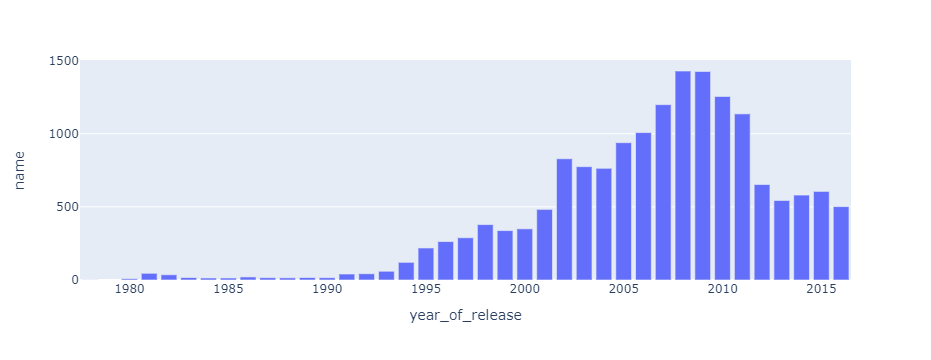

In [134]:
#Проанализируем количество выпущенных игр по годам :
df_games = df.pivot_table(index='year_of_release', values=['name'], aggfunc='count').reset_index()
px.bar(df_games, x='year_of_release', y='name')

В целом наблюдаются резкие смены трендов: от интенсивного роста с 1990 года до резкого падения к 2012. 
Возможно предположить, что для прогнозирования нам потребуются данные только с 2012 года для формирования тренда

Самые популярные платформы:


,platform,name
16,PS2,2161
4,DS,2151
17,PS3,1331
26,Wii,1320
28,X360,1262


PS2


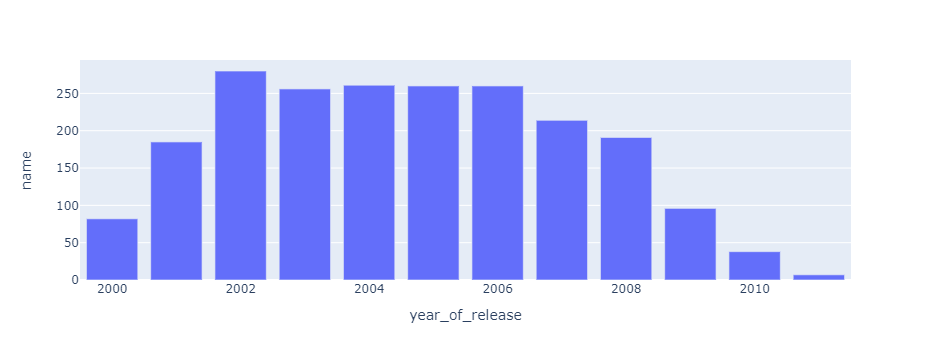

DS


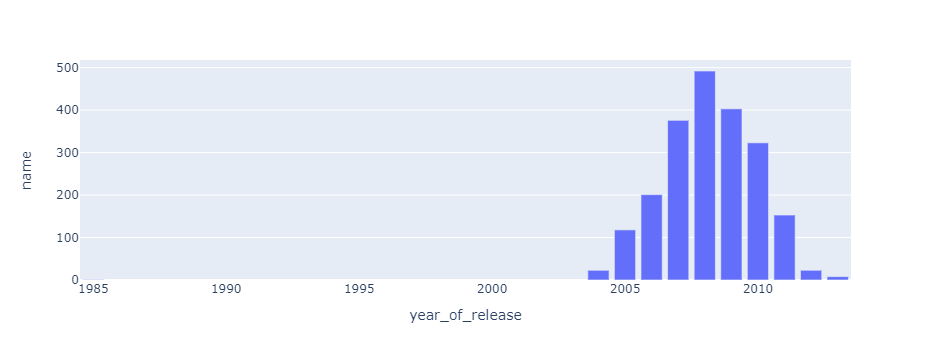

PS3


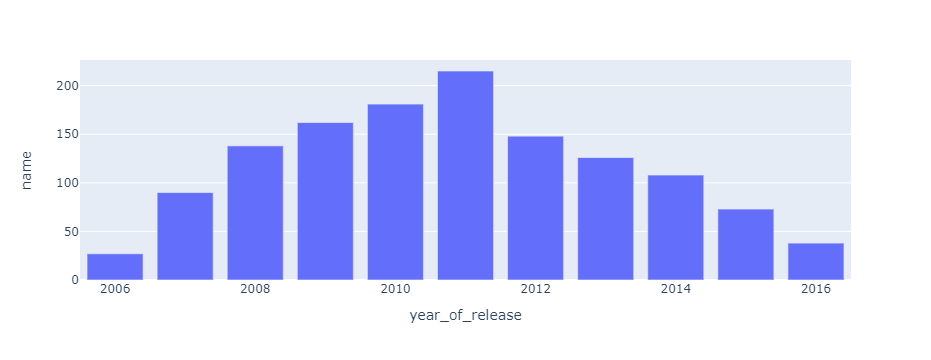

Wii


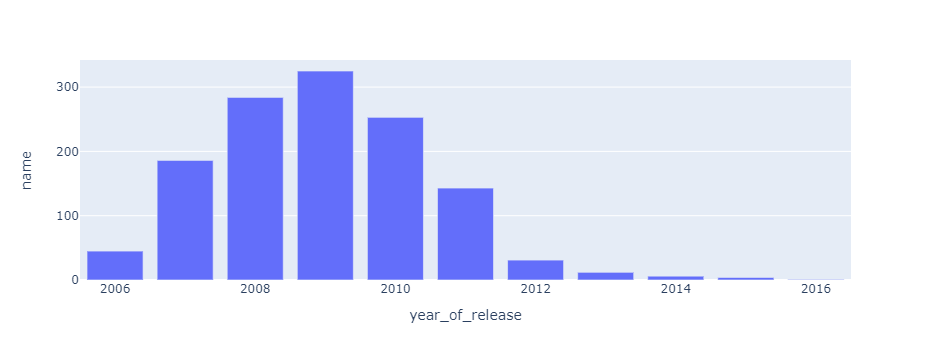

X360


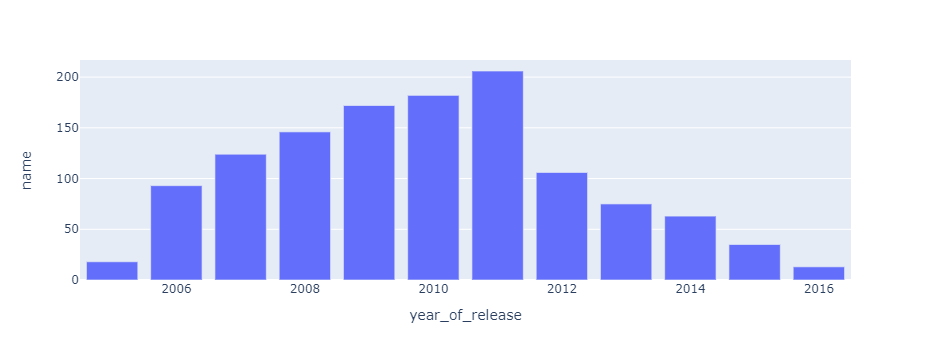

In [135]:
#Проанализируем количество выпущенных игр по платформам и годам:
df_platform= df.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc=['count']).reset_index().set_index('year_of_release')

print ('Самые популярные платформы:')
display(df.pivot_table(index='platform', values=['name'], aggfunc='count').reset_index().sort_values(by='name', ascending=False).head(5))

top_platforms = ['PS2', 'DS', 'PS3', 'Wii', 'X360']
for row in top_platforms:
    stat_plat = df.query('platform == @row')
    stat_plat = stat_plat.groupby('year_of_release')['name'].count().reset_index()
    print(row)
    fig = px.bar(stat_plat, x='year_of_release', y='name')
    fig.show()
    



Как видно из диаграмм, каждая платформа имеет достаточно короткий период жизни со своим пиком
Количество релизов нарастает, а затем затухает. 

In [136]:
#Рассчитаем среднее время жизни платформы, испоьзовав сводную таблицу df_platform
df_platform.loc['active_years'] = df_platform.apply(lambda x: x.count())
#суммарное количество релизов по платформам
df_platform.loc['release_sum'] = df_platform.apply(lambda x: x.sum())
display(df_platform)
print('Срок жизни платформы ориентировочно составляет', int(df_platform.loc['active_years'].median()), 'лет')

count                                                       \
platform          2600  3DO    3DS    DC      DS     GB    GBA     GC   GEN   
year_of_release                                                               
1978.0             1.0  NaN    NaN   NaN     NaN    NaN    NaN    NaN   NaN   
1980.0             9.0  NaN    NaN   NaN     NaN    NaN    NaN    NaN   NaN   
1981.0            46.0  NaN    NaN   NaN     NaN    NaN    NaN    NaN   NaN   
1982.0            36.0  NaN    NaN   NaN     NaN    NaN    NaN    NaN   NaN   
1983.0            11.0  NaN    NaN   NaN     NaN    NaN    NaN    NaN   NaN   
1984.0             1.0  NaN    NaN   NaN     NaN    NaN    NaN    NaN   NaN   
1985.0             1.0  NaN    NaN   NaN     1.0    NaN    NaN    NaN   NaN   
1986.0             2.0  NaN    NaN   NaN     NaN    NaN    NaN    NaN   NaN   
1987.0             6.0  NaN    NaN   NaN     NaN    NaN    NaN    NaN   NaN   
1988.0             2.0  NaN    NaN   NaN     NaN    1.0    NaN    NaN   NaN   
1989.0             2.0  NaN    NaN   NaN     NaN   10.0    NaN    NaN   NaN   
1990.0             NaN  NaN    NaN   NaN     NaN    3.0    NaN    NaN   1.0   
1991.0             NaN  NaN    NaN   NaN     NaN    9.0    NaN    NaN   1.0   
1992.0             NaN  NaN    NaN   NaN     NaN    7.0    NaN    NaN   6.0   
1993.0             NaN  NaN    NaN   NaN     NaN    NaN    NaN    NaN   7.0   
1994.0             NaN  1.0    NaN   NaN     NaN    3.0    NaN    NaN  12.0   
1995.0             NaN  2.0    NaN   NaN     NaN    4.0    NaN    NaN   NaN   
1996.0             NaN  NaN    NaN   NaN     NaN    6.0    NaN    NaN   NaN   
1997.0             NaN  NaN    NaN   NaN     NaN    8.0    NaN    NaN   NaN   
1998.0             NaN  NaN    NaN   7.0     NaN    8.0    NaN    NaN   NaN   
1999.0             NaN  NaN    NaN  14.0     NaN   11.0    NaN    NaN   NaN   
2000.0             NaN  NaN    NaN  20.0     NaN   17.0    1.0    NaN   NaN   
2001.0             NaN  NaN    NaN   8.0     NaN   10.0  108.0   22.0   NaN   
2002.0             NaN  NaN    NaN   1.0     NaN    NaN  198.0  152.0   NaN   
2003.0             NaN  NaN    NaN   NaN     NaN    NaN  150.0  144.0   NaN   
2004.0             NaN  NaN    NaN   NaN    23.0    NaN  175.0   83.0   NaN   
2005.0             NaN  NaN    NaN   NaN   118.0    NaN  135.0   97.0   NaN   
2006.0             NaN  NaN    NaN   NaN   201.0    NaN   39.0   40.0   NaN   
2007.0             NaN  NaN    NaN   1.0   376.0    NaN    6.0    4.0   NaN   
2008.0             NaN  NaN    NaN   1.0   492.0    NaN    NaN    NaN   NaN   
2009.0             NaN  NaN    NaN   NaN   403.0    NaN    NaN    NaN   NaN   
2010.0             NaN  NaN    NaN   NaN   323.0    NaN    NaN    NaN   NaN   
2011.0             NaN  NaN  116.0   NaN   153.0    NaN    NaN    NaN   NaN   
2012.0             NaN  NaN   93.0   NaN    23.0    NaN    NaN    NaN   NaN   
2013.0             NaN  NaN   91.0   NaN     8.0    NaN    NaN    NaN   NaN   
2014.0             NaN  NaN   80.0   NaN     NaN    NaN    NaN    NaN   NaN   
2015.0             NaN  NaN   86.0   NaN     NaN    NaN    NaN    NaN   NaN   
2016.0             NaN  NaN   46.0   NaN     NaN    NaN    NaN    NaN   NaN   
active_years      11.0  2.0    6.0   7.0    11.0   13.0    8.0    7.0   5.0   
release_sum      128.0  5.0  518.0  59.0  2132.0  110.0  820.0  549.0  32.0   

                                                                              \
platform          GG    N64    NES    NG     PC PCFX      PS     PS2     PS3   
year_of_release                                                                
1978.0           NaN    NaN    NaN   NaN    NaN  NaN     NaN     NaN     NaN   
1980.0           NaN    NaN    NaN   NaN    NaN  NaN     NaN     NaN     NaN   
1981.0           NaN    NaN    NaN   NaN    NaN  NaN     NaN     NaN     NaN   
1982.0           NaN    NaN    NaN   NaN    NaN  NaN     NaN     NaN     NaN   
1983.0           NaN    NaN    6.0   NaN    NaN  NaN     Na

Срок жизни платформы ориентировочно составляет 7 лет


Учитывая время жизни платформ (7 лет) брать период более, чем 7 лет смысла не имеет. При этом, если брать период 2016 - 7, т.е. с 2009, мы захватим период с резким спадом. Пока что рациональным кажется рассматривать период с 2012 года - год, когда многие консоли уже подошли к своему спаду. В то же время наступает эпоха новых платформ, например, PS4

Также считаю, что не стоит учитывать в прогнозе 2016 год, т.е. год, в котором мы находимся. Указано, что мы анализируем данные в декабре, соответственно, год ещё не закончился. Более того: наибольшие продажи игр, как правило, происходят в конце декабря, т.е. во время подарков на новый год. Соответственно, в статистике за 2016 год мы получим заниженные значения в любом случае. 

In [137]:
#рассмотрим интересующий нас период
df_actual = df.query('year_of_release > 2011 and year_of_release < 2016').reset_index(drop=True)
display(df_actual)

#отсортируем платформы по уровню продаж:
print('Сортировка платформ по популярности')
display(df_actual.groupby('platform')['all_sales'].sum().reset_index().sort_values(by='all_sales', ascending=False).head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1,-1,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1,-1,14.60
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2379,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,-1.0,-1,-1,0.01
2380,End of Nations,PC,2012.0,Strategy,0.01,0.00,0.00,0.00,-1.0,-1,T,0.01
2381,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,-1,0.01
2382,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


Сортировка платформ по популярности


,platform,all_sales
3,PS3,285.19
4,PS4,244.89
9,X360,235.02
0,3DS,179.47
10,XOne,133.17


In [138]:
#Оценим перспективы каждой из платформ. Для этого оценим динамику продаж:
display(df_actual.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc=['sum']).reset_index().set_index('year_of_release'))

sum                                                    \
platform           3DS     DS     PC     PS3     PS4   PSP    PSV    Wii   
year_of_release                                                            
2012.0           51.36  11.01  23.22  107.36     NaN  7.69  16.19  21.71   
2013.0           56.57   1.54  12.38  113.25   25.99  3.14  10.59   8.59   
2014.0           43.76    NaN  13.28   47.76  100.00  0.24  11.90   3.75   
2015.0           27.78    NaN   8.52   16.82  118.90  0.12   6.25   1.14   

                                      
platform          WiiU   X360   XOne  
year_of_release                       
2012.0           17.56  99.74    NaN  
2013.0           21.65  88.58  18.96  
2014.0           22.03  34.74  54.07  
2015.0           16.35  11.96  60.14

Данные показывают, что суммарно за эти годы наиболее успешными платформами были PS3 и X360. Однако к 2015 их время уходит, а им на смену приходят консоли нового поколения: PS4 b Xone - это потенциально прибыльные платформы. Также нельзя исключать из анализа PC - несмотря на тренд консольных эксклюзивов, PC будет актуален всегда

PC


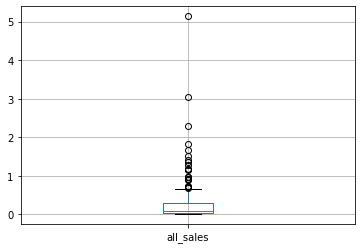

PS3


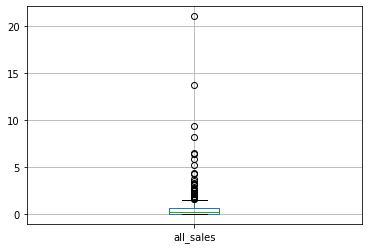

PS4


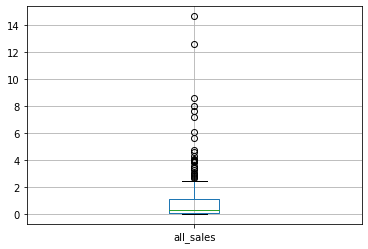

X360


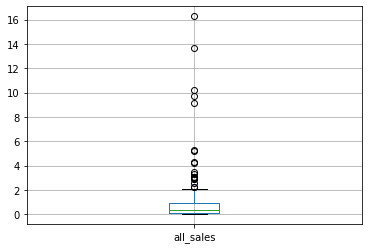

XOne


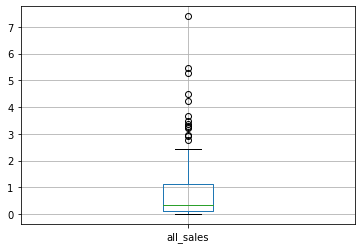

In [139]:
#Оценим разброс продаж по играм внутри популярных платформ, которые были определены ранее:
top_platforms = ['PC', 'PS3', 'PS4', 'X360', 'XOne']
for name in top_platforms:
    print(name)
    fig = df_actual.query('platform == @name').boxplot(column='all_sales')
    plt.show()

В основном по платформам большинство игр продаётся тиражом не более двух миллионов копий. При этом на каждой платформе есть свои выдающиеся хиты с огромным количеством продаж. Такие значения нельзя трактовать как выбросы: это реальные игровые хиты, оказавшие огромное влияние на индустрию.
Посмотрим, коррелируют ли оценки и продажи.

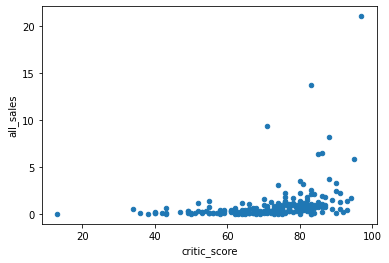

Коэффициент корреляции продаж и оценок критиков: 0.2572618402893972


In [140]:
#рассмотрим зависимость числа продаж от оценок пользователей и критиков
df_actual.query('(platform == "PS3") and (critic_score > 0)').plot(x='critic_score', y='all_sales', kind='scatter')
plt.show()
print('Коэффициент корреляции продаж и оценок критиков:', df_actual['critic_score'].corr(df_actual['all_sales']))

Как видно и из диаграмм рассеяния, и из значения коэффициента - корреляции между оценками и продажи нет. Это логично: огромная часть игр не находит широкой популярности в массе. При этом такие игры очень ценятся хардкорными игроками, которые играют во всё. Проверим, наблюдается ли такая же ситуация для PC:

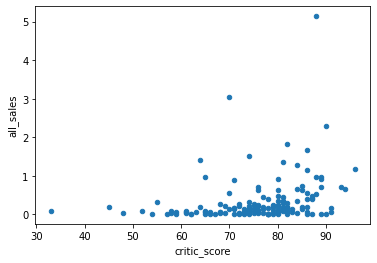

Коэффициент корреляции продаж и оценок критиков: 0.2572618402893972


In [141]:
df_actual.query('(platform == "PC") and (critic_score > 0)').plot(x='critic_score', y='all_sales', kind='scatter')
plt.show()
print('Коэффициент корреляции продаж и оценок критиков:', df_actual['critic_score'].corr(df_actual['all_sales']))

Выводы подтвердились. Вообще, сама по себе индустрия отзывов и оценок абсолютно необъективна: накрутки, покупки отзывов критиков. Предзаказы игр, которые должны были бы быть хорошими, но оказались плохими. Отсюда могут быть высокие продажи при плохих оценках и т.д. Короче говоря: оценки игры и её продажи не коррелируют (конечно, есть исключения, но они редки)

PS3


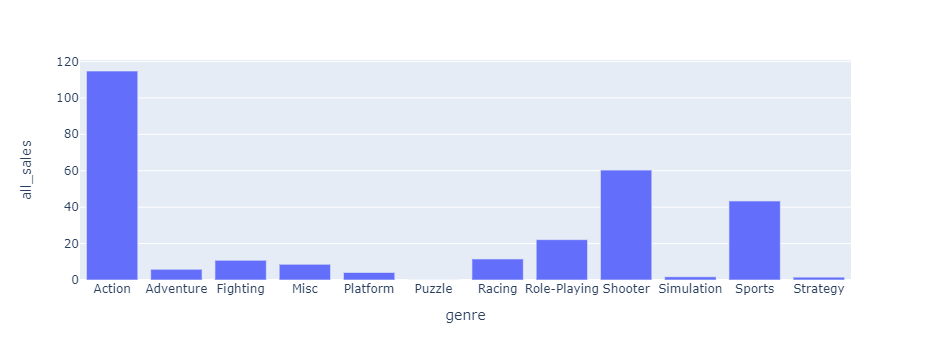

X360


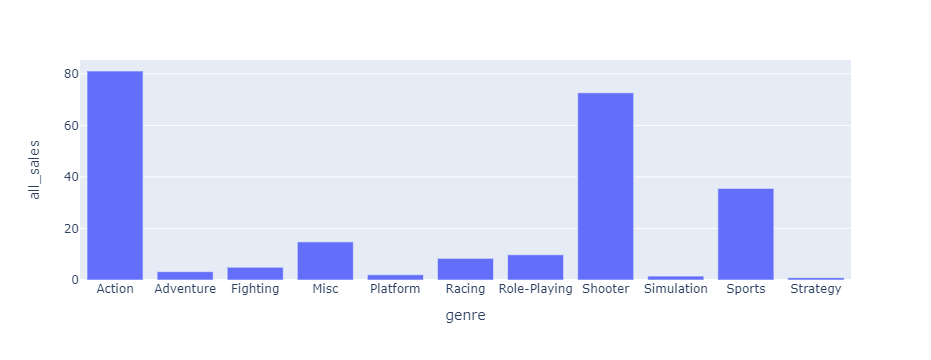

PC


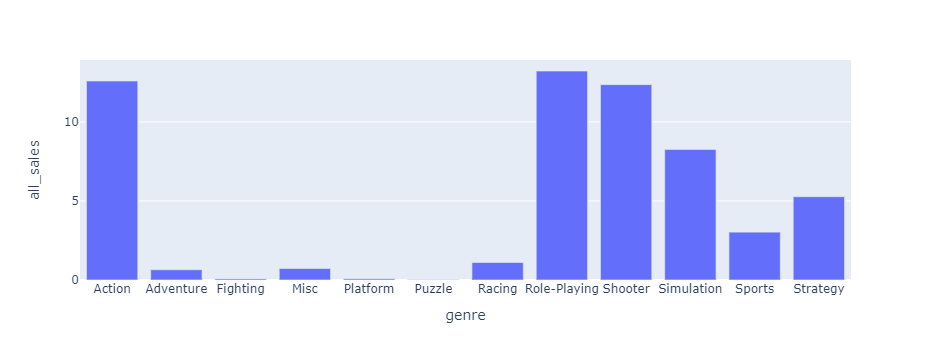

In [142]:
#рассмотрим распределение продаж по жанрам на двух популярных платформах: PS3 и PC, X360
print ('PS3')
df_genre = df_actual.query('platform=="PS3"').pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales', 'other_sales', 'all_sales'], aggfunc='sum').reset_index()
fig = px.bar(df_genre, x='genre', y='all_sales')
fig.show()

print ('X360')
df_genre = df_actual.query('platform=="X360"').pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales', 'other_sales', 'all_sales'], aggfunc='sum').reset_index()
fig = px.bar(df_genre, x='genre', y='all_sales')
fig.show()

print ('PC')
df_genre = df_actual.query('platform=="PC"').pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales', 'other_sales', 'all_sales'], aggfunc='sum').reset_index()
fig = px.bar(df_genre, x='genre', y='all_sales')
fig.show()

Действительно, разница в жанрах есть.

In [143]:
display(df_actual)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1,-1,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1,-1,14.60
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2379,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,-1.0,-1,-1,0.01
2380,End of Nations,PC,2012.0,Strategy,0.01,0.00,0.00,0.00,-1.0,-1,T,0.01
2381,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,-1,0.01
2382,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


<div class="alert alert-block alert-info">
  
  <b>Выводы по шагу 3</b>
    
 На данном шаге было проанализировано большое количество разнообразных данных. Итоговые выводы, которые помогли нам лучше понять взаимосвязи внутри данных:
    
    - Проанализированы периоды игр. Принято решение рассматривать промежуток с 2012 по 2015 год, в связи с неполнотой данных за 2016 год и резким нарушением тренда в 2011 году.
    - Каждая платформа "живёт" около 7 лет, затем на смену приходит новое поколение. Исключение - PC
    - Наиболее перспективные платформы: Xone, PS4, PC
    - Отзывы критиков и игроков не коррелируют с объемами продаж, на что есть ряд объективных причин: предзаказы, коррупция и расслоение игрового сообщества на казуалов и хардкорщиков.
    - На различных платформах оказываются популярными разные жанры: для приставок преимущественно популярны Action, Shooter и Sport. На PC к этим жанрам добавляются RPG, Silmulation, Strategy. В целом самыми популярными играми везде являются Action. На PC популярностью обладают другие жанры в связи с более широкими возможностями управления.
    
</div>

<div class="alert alert-block alert-info">
  
  <b>Шаг 4. Портрет пользователя по регионам</b>
    
    
</div>

In [144]:
#Посчитаем суммарное количество продаж по регионам и годам, а также в целом:
df_sales = (df_actual
            .pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales', 'other_sales', 'all_sales'], aggfunc='sum')
            .sort_values(by='all_sales', ascending=False)
            .reset_index()
           )
#доли
df_sales['all_sales'] /= df_sales['all_sales'].sum()
df_sales['eu_sales'] /= df_sales['eu_sales'].sum()
df_sales['jp_sales'] /= df_sales['jp_sales'].sum()
df_sales['na_sales'] /= df_sales['na_sales'].sum()
df_sales['other_sales'] /= df_sales['other_sales'].sum()
  
print('Суммарные продажи')
display(df_sales.head(5))
print ('EU-регион')
display(df_sales.sort_values(by='eu_sales', ascending=False).head(5))

print ('NA-регион')
display(df_sales.sort_values(by='na_sales', ascending=False).head(5))

print ('JP-регион')
display(df_sales.sort_values(by='jp_sales', ascending=False).head(5))

print ('Оставшиеся регионы')
display(df_sales.sort_values(by='other_sales', ascending=False).head(5))

Суммарные продажи


,platform,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,PS3,0.216613,0.231782,0.196168,0.188100,0.302724
1,PS4,0.186003,0.239925,0.058983,0.159787,0.268986
2,X360,0.178507,0.162006,0.009061,0.255219,0.143139
3,3DS,0.136314,0.088477,0.460322,0.093711,0.058089
4,XOne,0.101148,0.092098,0.001905,0.144403,0.084910


EU-регион


,platform,all_sales,eu_sales,jp_sales,na_sales,other_sales
1,PS4,0.186003,0.239925,0.058983,0.159787,0.268986
0,PS3,0.216613,0.231782,0.196168,0.188100,0.302724
2,X360,0.178507,0.162006,0.009061,0.255219,0.143139
4,XOne,0.101148,0.092098,0.001905,0.144403,0.084910
3,3DS,0.136314,0.088477,0.460322,0.093711,0.058089


NA-регион


,platform,all_sales,eu_sales,jp_sales,na_sales,other_sales
2,X360,0.178507,0.162006,0.009061,0.255219,0.143139
0,PS3,0.216613,0.231782,0.196168,0.188100,0.302724
1,PS4,0.186003,0.239925,0.058983,0.159787,0.268986
4,XOne,0.101148,0.092098,0.001905,0.144403,0.084910
3,3DS,0.136314,0.088477,0.460322,0.093711,0.058089


JP-регион


,platform,all_sales,eu_sales,jp_sales,na_sales,other_sales
3,3DS,0.136314,0.088477,0.460322,0.093711,0.058089
0,PS3,0.216613,0.231782,0.196168,0.188100,0.302724
7,PSV,0.034126,0.024078,0.100883,0.019834,0.039879
5,WiiU,0.058933,0.051910,0.071218,0.065929,0.039526
10,PSP,0.008499,0.000922,0.060426,0.000238,0.001200


Оставшиеся регионы


,platform,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,PS3,0.216613,0.231782,0.196168,0.188100,0.302724
1,PS4,0.186003,0.239925,0.058983,0.159787,0.268986
2,X360,0.178507,0.162006,0.009061,0.255219,0.143139
4,XOne,0.101148,0.092098,0.001905,0.144403,0.084910
3,3DS,0.136314,0.088477,0.460322,0.093711,0.058089


Регионы действительно отличаются по продажам на различных платформах. 
В европе, Америке и других регионах особенно популярны консоли. При этом в северной америке - xbox, а в Европе - PlayStation
В Японии же ситуация другая - они больше увлекаются портативными консолями, хотя PlayStation 3 тоже достаточно популярна.
Таким образом, можно сказать, что именно Японский рынок сильно не вписывается в общую концепцию

In [145]:
#Посмотрим аналогичную ситуацию по жанрам:
df_sales = (df_actual
            .pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales', 'other_sales', 'all_sales'], aggfunc='sum')
            .sort_values(by='all_sales', ascending=False)
            .reset_index()
           )

#доли
df_sales['all_sales'] /= df_sales['all_sales'].sum()
df_sales['eu_sales'] /= df_sales['eu_sales'].sum()
df_sales['jp_sales'] /= df_sales['jp_sales'].sum()
df_sales['na_sales'] /= df_sales['na_sales'].sum()
df_sales['other_sales'] /= df_sales['other_sales'].sum()

print('Суммарные продажи')
display(df_sales.head(5))
print ('EU-регион')
display(df_sales.sort_values(by='eu_sales', ascending=False).head(5))

print ('NA-регион')
display(df_sales.sort_values(by='na_sales', ascending=False).head(5))

print ('JP-регион')
display(df_sales.sort_values(by='jp_sales', ascending=False).head(5))

print ('Оставшиеся регионы')
display(df_sales.sort_values(by='other_sales', ascending=False).head(5))


Суммарные продажи


,genre,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,Action,0.312178,0.326295,0.263923,0.308677,0.339286
1,Shooter,0.202424,0.214157,0.047152,0.235386,0.227555
2,Role-Playing,0.132631,0.097125,0.339528,0.106421,0.094791
3,Sports,0.119688,0.125285,0.040919,0.135503,0.137069
4,Misc,0.062616,0.056321,0.068217,0.068548,0.053148


EU-регион


,genre,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,Action,0.312178,0.326295,0.263923,0.308677,0.339286
1,Shooter,0.202424,0.214157,0.047152,0.235386,0.227555
3,Sports,0.119688,0.125285,0.040919,0.135503,0.137069
2,Role-Playing,0.132631,0.097125,0.339528,0.106421,0.094791
4,Misc,0.062616,0.056321,0.068217,0.068548,0.053148


NA-регион


,genre,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,Action,0.312178,0.326295,0.263923,0.308677,0.339286
1,Shooter,0.202424,0.214157,0.047152,0.235386,0.227555
3,Sports,0.119688,0.125285,0.040919,0.135503,0.137069
2,Role-Playing,0.132631,0.097125,0.339528,0.106421,0.094791
4,Misc,0.062616,0.056321,0.068217,0.068548,0.053148


JP-регион


,genre,all_sales,eu_sales,jp_sales,na_sales,other_sales
2,Role-Playing,0.132631,0.097125,0.339528,0.106421,0.094791
0,Action,0.312178,0.326295,0.263923,0.308677,0.339286
4,Misc,0.062616,0.056321,0.068217,0.068548,0.053148
8,Simulation,0.025239,0.029148,0.058175,0.014303,0.014540
7,Fighting,0.030397,0.020742,0.050153,0.032873,0.027739


Оставшиеся регионы


,genre,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,Action,0.312178,0.326295,0.263923,0.308677,0.339286
1,Shooter,0.202424,0.214157,0.047152,0.235386,0.227555
3,Sports,0.119688,0.125285,0.040919,0.135503,0.137069
2,Role-Playing,0.132631,0.097125,0.339528,0.106421,0.094791
4,Misc,0.062616,0.056321,0.068217,0.068548,0.053148


Можно наблюдать аналогичную ситуацию: Япония стоит особняком
В Европе, Америке и других регионах топ5 одинаковый: Action, Shooter, Sports, RPG, Misc. Экшены и шутеры на первых двух местах везде, рпг и спорт немного конкурируют.
Япония выделяется: здесь RPG занимает первую позицию, Action на второй, спортивные игры поменялись местами с файтингами.

In [146]:
#Разберемся с рейтингом ESRB
#В разделе с фильтрацией пропущенных данных мы заменили пропуски на -1. Заменим -1 та unknown
df_actual['rating'] = df_actual['rating'].replace(-1, 'unknown')

df_sales = (df_actual
            .pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales', 'other_sales', 'all_sales'], aggfunc='sum')
            .sort_values(by='all_sales', ascending=False)
            .reset_index()
           )
#доли
df_sales['all_sales'] /= df_sales['all_sales'].sum()
df_sales['eu_sales'] /= df_sales['eu_sales'].sum()
df_sales['jp_sales'] /= df_sales['jp_sales'].sum()
df_sales['na_sales'] /= df_sales['na_sales'].sum()
df_sales['other_sales'] /= df_sales['other_sales'].sum()

print('Суммарные продажи')
display(df_sales.head(5))
print ('EU-регион')
display(df_sales.sort_values(by='eu_sales', ascending=False).head(10))

print ('NA-регион')
display(df_sales.sort_values(by='na_sales', ascending=False).head(10))

print ('JP-регион')
display(df_sales.sort_values(by='jp_sales', ascending=False).head(10))

print ('Оставшиеся регионы')
display(df_sales.sort_values(by='other_sales', ascending=False).head(10))

Суммарные продажи


,rating,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,M,0.358320,0.389421,0.115427,0.395392,0.412479
1,unknown,0.226509,0.184438,0.545507,0.173577,0.175678
2,E,0.198566,0.218218,0.157327,0.194858,0.200099
3,E10+,0.111166,0.113169,0.044670,0.131657,0.107072
4,T,0.105439,0.094754,0.137069,0.104516,0.104673


EU-регион


,rating,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,M,0.358320,0.389421,0.115427,0.395392,0.412479
2,E,0.198566,0.218218,0.157327,0.194858,0.200099
1,unknown,0.226509,0.184438,0.545507,0.173577,0.175678
3,E10+,0.111166,0.113169,0.044670,0.131657,0.107072
4,T,0.105439,0.094754,0.137069,0.104516,0.104673


NA-регион


,rating,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,M,0.358320,0.389421,0.115427,0.395392,0.412479
2,E,0.198566,0.218218,0.157327,0.194858,0.200099
1,unknown,0.226509,0.184438,0.545507,0.173577,0.175678
3,E10+,0.111166,0.113169,0.044670,0.131657,0.107072
4,T,0.105439,0.094754,0.137069,0.104516,0.104673


JP-регион


,rating,all_sales,eu_sales,jp_sales,na_sales,other_sales
1,unknown,0.226509,0.184438,0.545507,0.173577,0.175678
2,E,0.198566,0.218218,0.157327,0.194858,0.200099
4,T,0.105439,0.094754,0.137069,0.104516,0.104673
0,M,0.358320,0.389421,0.115427,0.395392,0.412479
3,E10+,0.111166,0.113169,0.044670,0.131657,0.107072


Оставшиеся регионы


,rating,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,M,0.358320,0.389421,0.115427,0.395392,0.412479
2,E,0.198566,0.218218,0.157327,0.194858,0.200099
1,unknown,0.226509,0.184438,0.545507,0.173577,0.175678
3,E10+,0.111166,0.113169,0.044670,0.131657,0.107072
4,T,0.105439,0.094754,0.137069,0.104516,0.104673


Значения рейтинга педставлены следующими позициями:
M - mature 17+ 
Т - teen (для подростков)
Е10+ - для детей 10+
E - для всех

Опять же делим весь мир/японию
В мире наиболее продаваемые игры M, E, E10+, T. Короче говоря, больше всего предпочитают играть дети повзрослее (или же просто не работают соответствующие ограничения)
В японии наиболее популярны игры "для всех", а игры для людей 17+ - на третьем месте.


В целом можно сделать следующий вывод: Япония стоит особняком и стандартный Японский пользователь предпочитает играть в РПГ на портативной консоли. По всей видимости, это связано с культурными особенностями и темпом жизни. При этом, по всей видимости, играют в игры, доступные для всех возрастов (без насилия, жестокости и т.д. и т.п.). Какие-то, видимо, аниме-рпг.

Пользователи остального мира более коньюктурны: они пользуются одной из двух наиболее популярных станционарных консолей (xbox или PS) и предпочитают Экшены и Шутеры. РПГ также достаточно популярны, но, скорее, на станционарных компьютерах. Наиболее популярны игры для детей 17+.

<div class="alert alert-block alert-info">
  
  <b>Шаг 5. Проверка гипотез</b>
    
    
</div>

Заказчик поручил проверить несколько гипотез: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [147]:
#Приведем к одному типу
df_actual['user_score'] = df_actual['user_score'].astype('float64')

In [148]:
#получим выборки по платформам XboxeOne и PC, удалим пропуски 

#предпологаю, что выборки оценок для PC и XboxOne принадлежат разным генеральным совокупностям
#это разные платформы с разным контингентом, разной степенью портирования игр и т.д. и т.п. Дисперсии также разные.

#Нулевая гипотеза - средние пользовательские оценки по платформам одинаковы
#Альтернативная гипотеза - средние пользовательские рейтинги значимо отличаются друг от друга

df_ttest = df_actual.query('(user_score > 0)')
results = st.ttest_ind(df_ttest.query('platform == "XOne"')['user_score'], df_ttest.query('platform == "PC"')['user_score'], equal_var = True)
print ('p-значение: ', results.pvalue)
if results.pvalue > 0.01:
    print('Нулевая гипотеза принимается, предполагаем, что средние одинаковы')
else:
    print ('Отвергаем нулевую гипотезу')

p-значение:  0.9463196313131613
Нулевая гипотеза принимается, предполагаем, что средние одинаковы


Полученное значение p оказывается выше любого стандартного уровня значимости и, соответственно, не может опровергнуть нулевую гипотезу. Таким образом, вероятно, что средняя пользовательская оценка по двум платформам одинакова.

In [149]:
#сравнение средних оценок по жанрам Action и Sports

df_ttest = df_actual.query('(user_score > 0)').groupby('genre')['user_score'].apply(list)
results = st.ttest_ind(df_ttest['Action'], df_ttest['Sports'], equal_var = True)
print ('p-значение: ', results.pvalue)

#Нулевая гипотеза - средние пользовательские оценки по жанрам не отличаются друг от друга
#Альтернативная гипотеза - средние оценки по жанрам значимо отличаются друг от друга
if results.pvalue > 0.01:
    print('Нулевая гипотеза принимается')
else:
    print ('Отвергаем нулевую гипотезу, существуют значимые различия между выборками')
    
#Анализ показывает, что игроки иначе оценивают другой жанр, средние отличаются.

p-значение:  1.3744684534520844e-23
Отвергаем нулевую гипотезу, существуют значимые различия между выборками


# ВЫВОДЫ

В целом, задачей проекта являлся всесторонний анализ и поиск особенностей игровой индустрии. Оказалось, что различные регионы предпочитают разные платформы, разные жанры и даже возрастные ограничения. Нюансы были описаны в соответствующих шагах. В перспективе такой анализ может помочь нам прогнозировать данные о продажах игр в зависимости от региона и, внутри него, в зависимости от платформы, возраста, жанра и т.д. и т.п. Основные выводы по проекту:

- В качестве периода, задающего тренд, следует рассматривать промежуток с 2012 по 2015 год.
- Каждая платформа "живёт" около 7 лет, затем на смену приходит новое поколение. Исключение - PC
- Наиболее перспективные платформы: Xone, PS4, PC
- Отзывы критиков и игроков не коррелируют с объемами продаж, на что есть ряд объективных причин: предзаказы, коррупция и расслоение игрового сообщества на казуалов и хардкорщиков.
- В зависимости от региона, наблюдается различный портрет игрока: Японцы предпочитают РПГ на портативных консолях, а остальной мир играет в классические приставки (xbox, PS) в экшены и шутеры
- Одни и те же игры получают одинаковые средние игры вне зависимости от типа консоли
- Игры разных жанров значимо отличаются по своей средней оценке

